<a href="https://colab.research.google.com/github/Hash-sd/Data-Mining/blob/main/Algoritma_Apriori_dalam_Analisis_Asosiasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install efficient-apriori

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori
import os
import sys

# Assign main directory to a variable
main_dir = os.path.dirname(sys.path[0])

# Baca dataset
df = pd.read_csv(main_dir+'/content/Market_Basket_Optimisation.csv', encoding = 'utf-8', header=None)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploration

In [ ]:
# Put all transactions into a single list
txns = df.values.reshape(-1).tolist()

# Create a dataframe using this single list and add a column for count
df_list = pd.DataFrame (txns)
df_list['Count']=1

# Group by items and rename columns
df_list = df_list.groupby(by=[0], as_index=False).count().sort_values (by=['Count'], ascending=True) # count
df_list['Percentage'] = (df_list['Count'] / df_list['Count'].sum()) # percentage
df_list = df_list.rename(columns={0: 'Item'})
 # Show dataframe
df_list

,Item,Count,Percentage
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000238
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041889
43,french fries,1282,0.043660
100,spaghetti,1306,0.044478
37,eggs,1348,0.045908


Visualisasi distribusi frekuensi dalam diagram batang

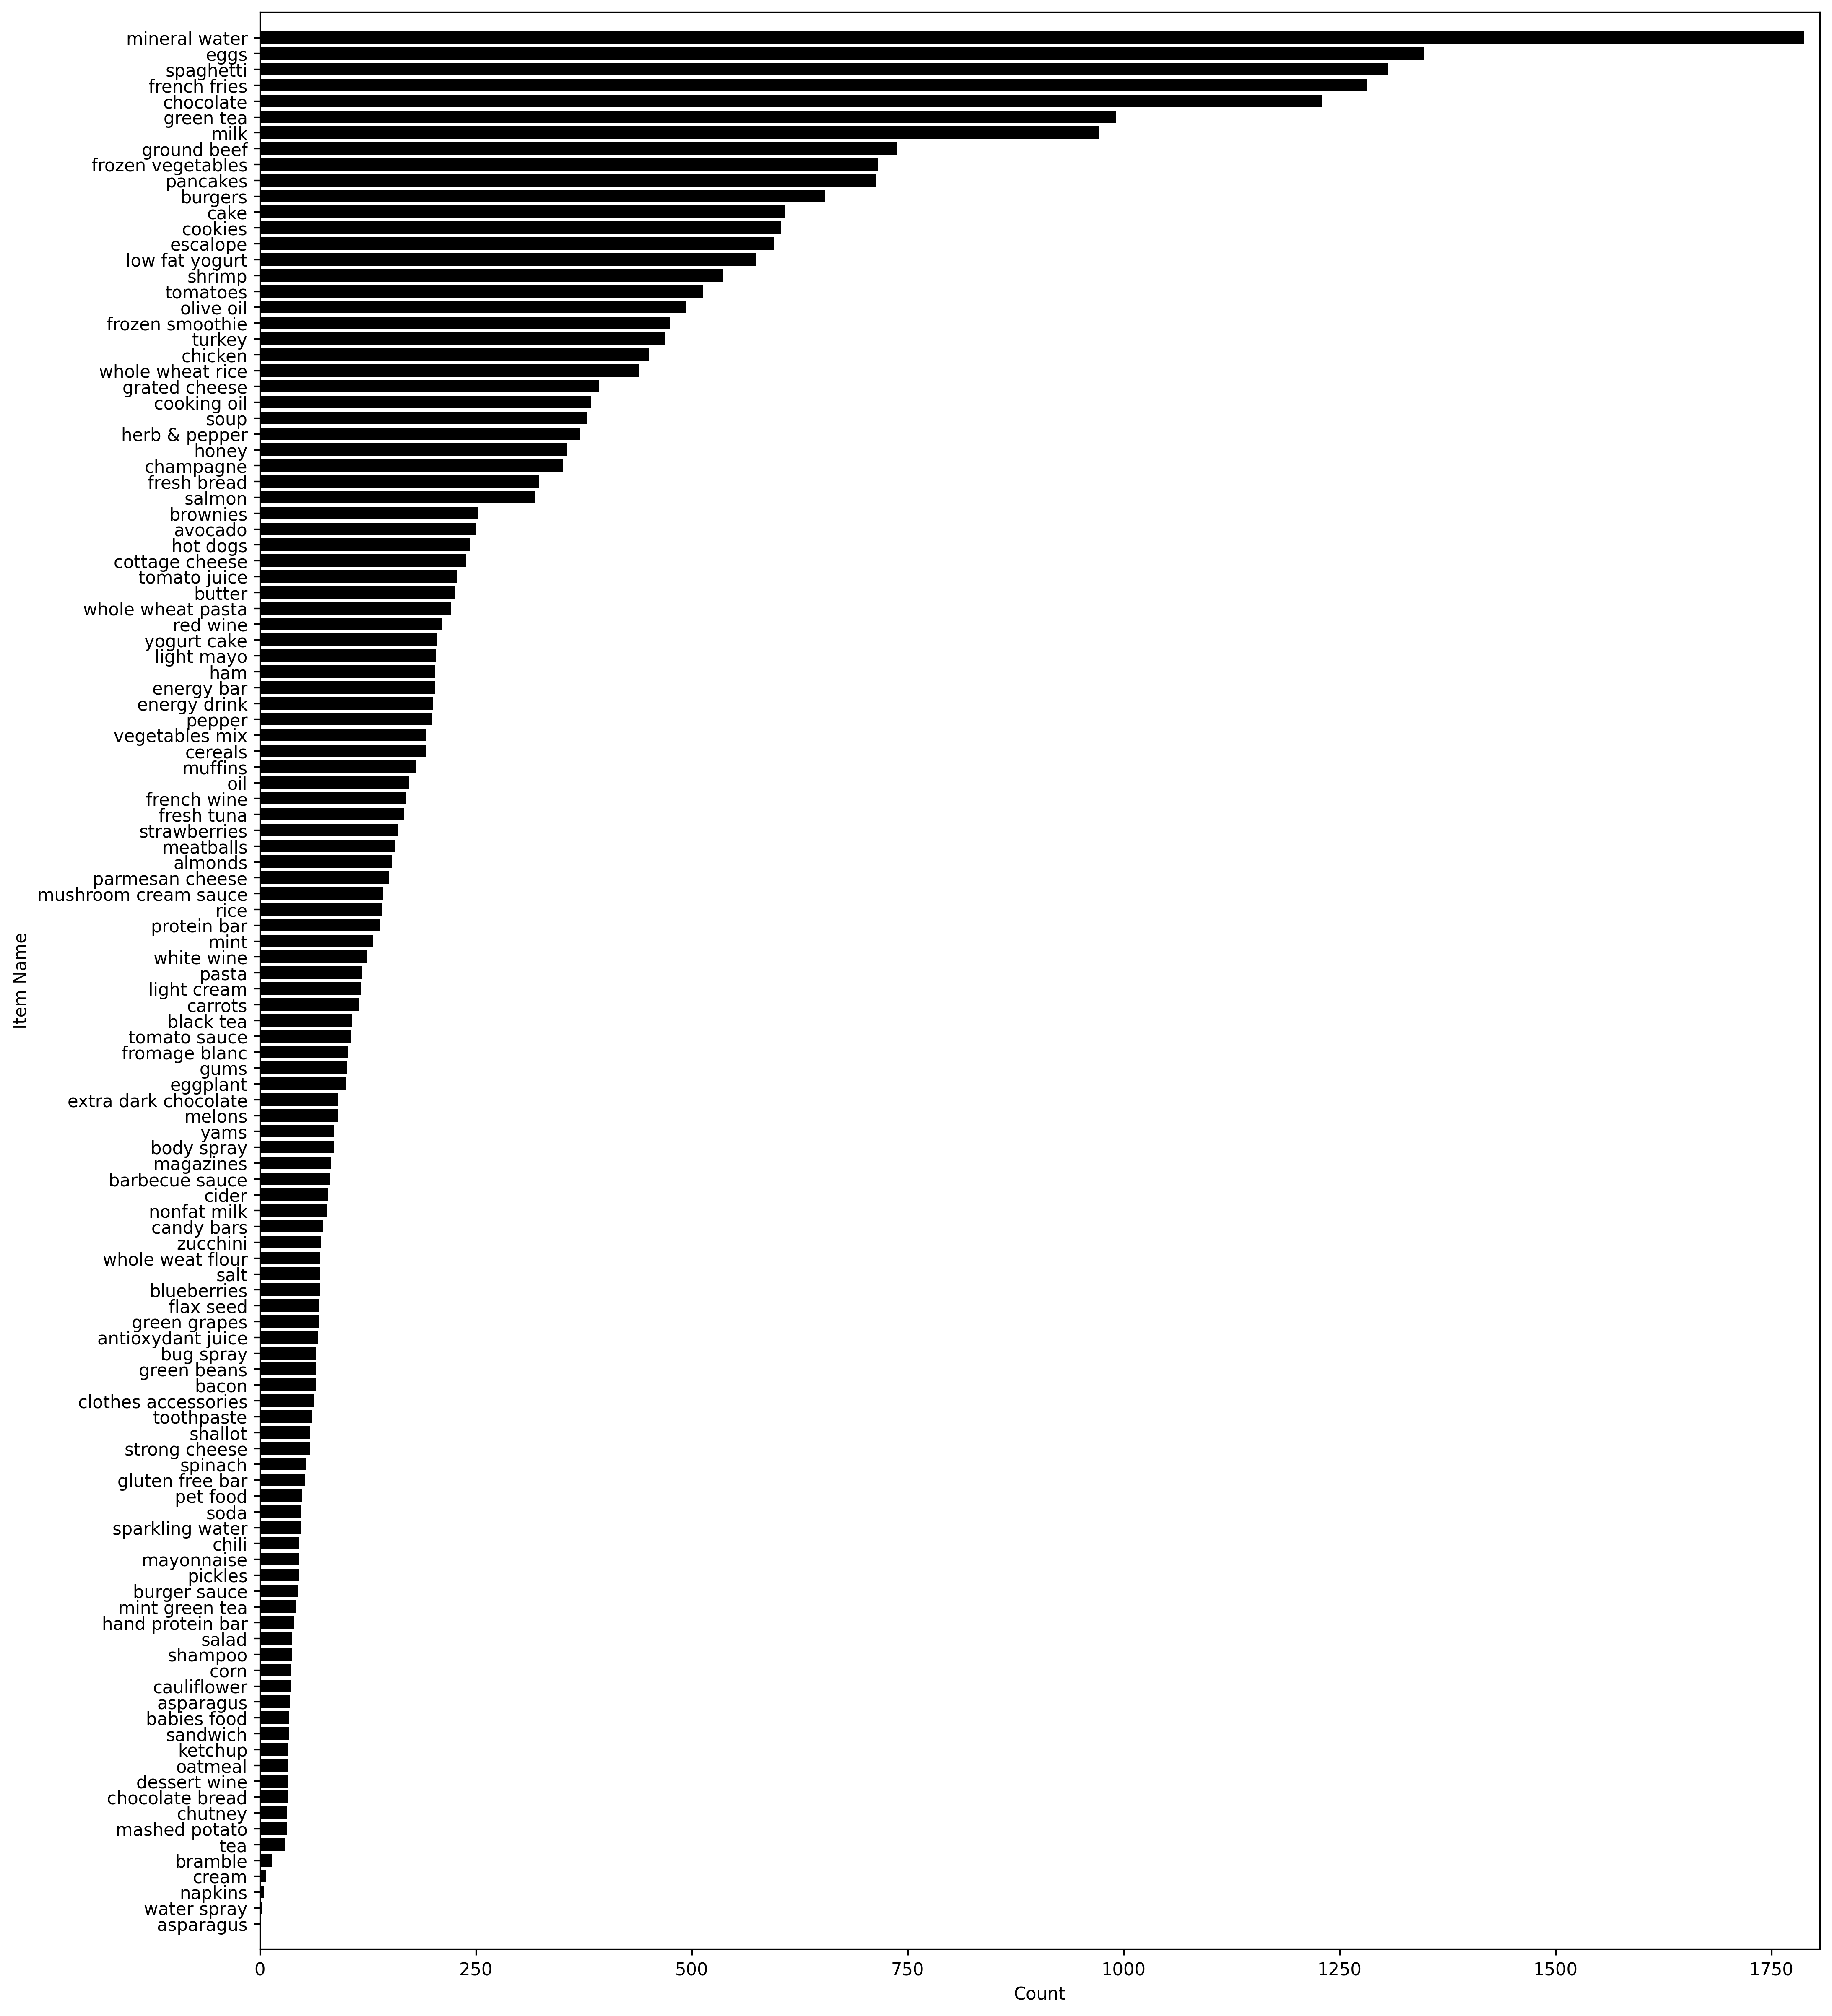

In [ ]:
# Draw a horizontal bar chart
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins (0.01)
plt.show()

Algoritma Apriori

In [ ]:
# create a list of lists from a dataFrame
txns2 = df.stack().groupby(level=0).apply(list).tolist()
txns2

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [ ]:
itemsets, rules = apriori(txns2, min_support=0.03, min_confidence=0.2, verbosity=1)
for item in sorted (rules, key=lambda item: (item.lift,item.conviction), reverse=True):
  print(item)

Generating itemsets.
 Counting itemsets of length 1.
  Found 120 candidate itemsets of length 1.
  Found 36 large itemsets of length 1.
 Counting itemsets of length 2.
  Found 630 candidate itemsets of length 2.
  Found 18 large itemsets of length 2.
 Counting itemsets of length 3.
  Found 14 candidate itemsets of length 3.
Itemset generation terminated.

Generating rules from itemsets.
 Generating rules of size 2.
Rule generation terminated.

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.305)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.572, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1

## Latihan

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from mlxtend.preprocessing import TransactionEncoder

import warnings
warnings.filterwarnings ("ignore")

data = pd.read_csv('/content/GroceryStoreDataSet.csv', header=None)
data.columns=["Product"]
data


,Product
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [ ]:
print("Number Of Rows is", data.shape[0])
print("Number Of Columns is", data.shape[1])

Number Of Rows is 20
Number Of Columns is 1


In [ ]:
data.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [ ]:
data =list(data["Product"].apply(lambda x:x.split(",")))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [ ]:
te = TransactionEncoder()
te_data = te.fit_transform(data)
df =pd.DataFrame(te_data, columns =te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [ ]:
df_zero = df.replace(True, 1)
df_zero

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,False,1,False,False,False,False,False,1,False,False
1,1,False,1,False,False,1,False,False,1,False,False
2,False,1,1,False,False,False,False,False,False,False,1
3,False,False,1,False,False,False,1,1,1,False,False
4,1,False,False,False,False,False,False,1,False,False,1
5,False,1,1,False,False,False,False,False,False,False,1
6,False,False,False,False,False,1,False,1,False,False,1
7,1,False,1,False,False,False,False,1,False,False,1
8,False,False,1,False,False,False,1,1,False,False,1
9,False,False,1,False,False,False,False,False,1,False,False


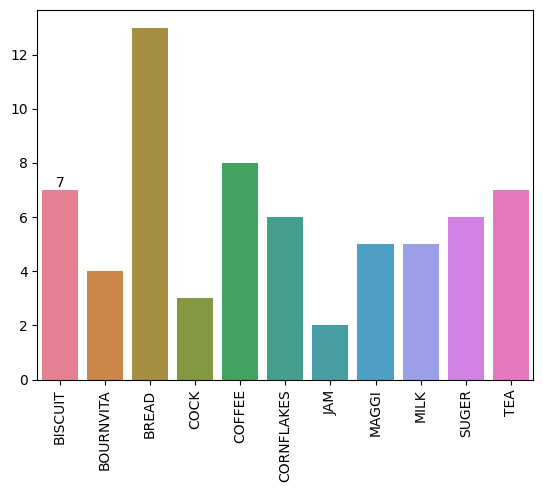

In [ ]:
ax = sns.barplot(df_zero, estimator="sum", errorbar=None)
ax.bar_label(ax.containers [0], fontsize=10)
plt.xticks(rotation=90)
plt.show()

In [ ]:
first = pd.DataFrame(df.sum() / df.shape[0],
                     columns = ["Support"]).sort_values("Support", ascending =False)
first

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [ ]:
first[first['Support']>= 0.15]

,Support
BREAD,0.65
COFFEE,0.40
BISCUIT,0.35
TEA,0.35
CORNFLAKES,0.30
SUGER,0.30
MAGGI,0.25
MILK,0.25
BOURNVITA,0.20
COCK,0.15


In [ ]:
second = list(itertools.combinations(first.index, 2))
second = [list(i) for i in second]
# Sample of combinations 4
second

[['BREAD', 'COFFEE'],
 ['BREAD', 'BISCUIT'],
 ['BREAD', 'TEA'],
 ['BREAD', 'CORNFLAKES'],
 ['BREAD', 'SUGER'],
 ['BREAD', 'MAGGI'],
 ['BREAD', 'MILK'],
 ['BREAD', 'BOURNVITA'],
 ['BREAD', 'COCK'],
 ['BREAD', 'JAM'],
 ['COFFEE', 'BISCUIT'],
 ['COFFEE', 'TEA'],
 ['COFFEE', 'CORNFLAKES'],
 ['COFFEE', 'SUGER'],
 ['COFFEE', 'MAGGI'],
 ['COFFEE', 'MILK'],
 ['COFFEE', 'BOURNVITA'],
 ['COFFEE', 'COCK'],
 ['COFFEE', 'JAM'],
 ['BISCUIT', 'TEA'],
 ['BISCUIT', 'CORNFLAKES'],
 ['BISCUIT', 'SUGER'],
 ['BISCUIT', 'MAGGI'],
 ['BISCUIT', 'MILK'],
 ['BISCUIT', 'BOURNVITA'],
 ['BISCUIT', 'COCK'],
 ['BISCUIT', 'JAM'],
 ['TEA', 'CORNFLAKES'],
 ['TEA', 'SUGER'],
 ['TEA', 'MAGGI'],
 ['TEA', 'MILK'],
 ['TEA', 'BOURNVITA'],
 ['TEA', 'COCK'],
 ['TEA', 'JAM'],
 ['CORNFLAKES', 'SUGER'],
 ['CORNFLAKES', 'MAGGI'],
 ['CORNFLAKES', 'MILK'],
 ['CORNFLAKES', 'BOURNVITA'],
 ['CORNFLAKES', 'COCK'],
 ['CORNFLAKES', 'JAM'],
 ['SUGER', 'MAGGI'],
 ['SUGER', 'MILK'],
 ['SUGER', 'BOURNVITA'],
 ['SUGER', 'COCK'],
 ['SUGER', 'JA

In [ ]:
# Inisialisasi variabel
value = []

# Loop untuk menghitung nilai Support
for i in range(len(second)):
    # Hitung support untuk setiap item di 'second'
    temp = df.T.loc[second[i]].sum()  # Baris ini melakukan agregasi nilai
    temp = len(temp[temp == df.T.loc[second[i]].shape[0]]) / df.shape[0]
    value.append(temp)

# Membuat DataFrame dari nilai Support
secondIteration = pd.DataFrame(value, columns=["Support"])

# Tambahkan kolom 'index' dan 'length'
secondIteration["index"] = [tuple(i) for i in second]
secondIteration["length"] = secondIteration["index"].apply(lambda x: len(x))

# Mengatur index dan mengurutkan berdasarkan Support
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending=False)

# Tampilkan hasil akhir
print(secondIteration)


                         Support  length
index                                   
(TEA, MAGGI)                0.20       2
(BREAD, TEA)                0.20       2
(BREAD, SUGER)              0.20       2
(BREAD, MILK)               0.20       2
(BREAD, BISCUIT)            0.20       2
(COFFEE, CORNFLAKES)        0.20       2
(COFFEE, SUGER)             0.20       2
(BREAD, COFFEE)             0.15       2
(BREAD, MAGGI)              0.15       2
(BREAD, BOURNVITA)          0.15       2
(COFFEE, COCK)              0.15       2
(BISCUIT, CORNFLAKES)       0.15       2
(BISCUIT, MILK)             0.10       2
(BISCUIT, COCK)             0.10       2
(CORNFLAKES, MILK)          0.10       2
(TEA, BOURNVITA)            0.10       2
(CORNFLAKES, COCK)          0.10       2
(SUGER, BOURNVITA)          0.10       2
(MAGGI, JAM)                0.10       2
(BISCUIT, MAGGI)            0.10       2
(TEA, CORNFLAKES)           0.10       2
(BREAD, JAM)                0.10       2
(BISCUIT, TEA)  

In [ ]:
df_second = pd.DataFrame()
df_second.insert(0, "Name Product", tuple(second))
df_second.insert(1, "Support", [0.20, 0.20, 0.20, 0.20, 0.20, 0.20, 0.20,
                                0.15, 0.15, 0.15, 0.15, 0.15,
                                0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10,
                                0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                                0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
                                0.00, 0.00, 0.00])

df_second


,Name Product,Support
0,"[BREAD, COFFEE]",0.20
1,"[BREAD, BISCUIT]",0.20
2,"[BREAD, TEA]",0.20
3,"[BREAD, CORNFLAKES]",0.20
4,"[BREAD, SUGER]",0.20
5,"[BREAD, MAGGI]",0.20
6,"[BREAD, MILK]",0.20
7,"[BREAD, BOURNVITA]",0.15
8,"[BREAD, COCK]",0.15
9,"[BREAD, JAM]",0.15


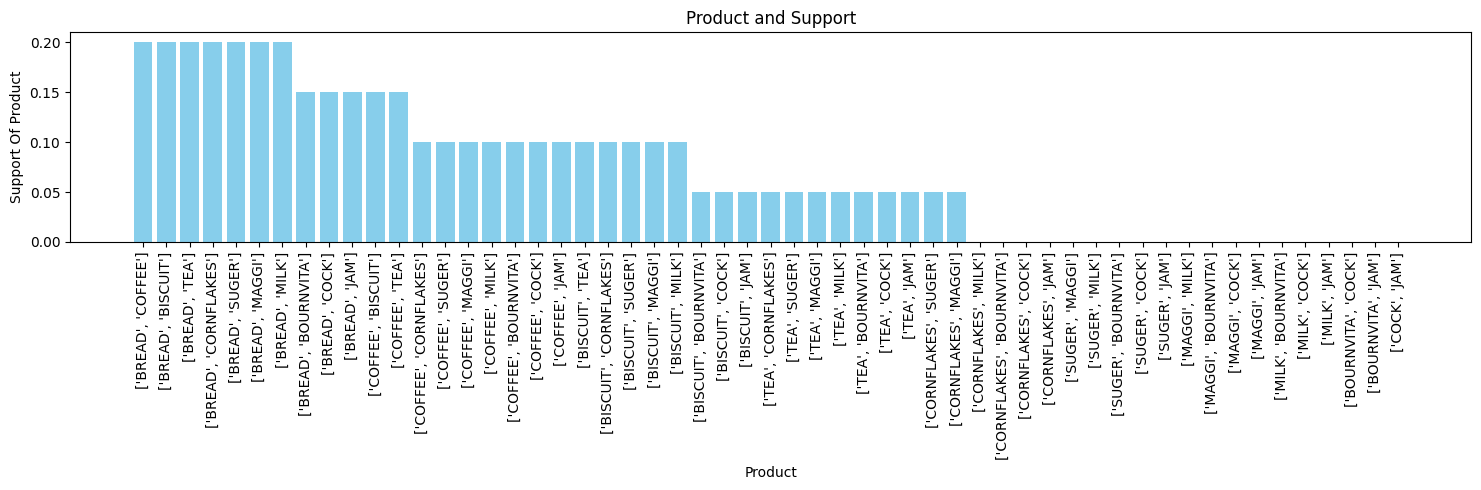

In [ ]:
# Visualisasi Support Produk
plt.figure(figsize=(15, 5))  # Perbaikan sintaks pada `figsize`
x = np.arange(len(df_second))  # Indeks produk
y = df_second["Support"]  # Kolom 'Support' dari DataFrame
labels = df_second["Name Product"]  # Kolom 'Name Product' dari DataFrame

plt.bar(x, y, color="skyblue")  # Bar chart
plt.xticks(x, labels, rotation=90)  # Label sumbu x
plt.title("Product and Support")
plt.xlabel("Product")
plt.ylabel("Support Of Product")
plt.tight_layout()  # Menghindari label saling tumpang tindih
plt.show()


In [ ]:
def ar_iterations(data, num_iter=1, support_value=0.1, iteration_index=None):
  def ar_calculation(iteration_Index = iteration_index):
    # Iterasi berikutnya
    value = []
    for i in range(len(iteration_index)):
        # Hitung support untuk setiap item
        result = data.T.loc[iteration_index[i]].sum()
        result = len(result[result == data.T.loc[iteration_index[i]].shape[0]]) / data.shape[0]
        value.append(result)

    # Gabungkan hasil perhitungan ke DataFrame
    result = pd.DataFrame(value, columns=["Support"])
    result["index"] = [tuple(i) for i in iteration_index]
    result["length"] = result["index"].apply(lambda x: len(x))

    # Filter berdasarkan nilai support
    result = result.set_index("index").sort_values("Support", ascending=False)
    result = result[result["Support"] > support_value]
    return result


In [ ]:
first = pd.DataFrame(df.sum() / df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
first = first[first["Support"] > 0.15]
first["length"] = 1

# Iterasi pertama
if num_iter == 1:
  first = pd.DataFrame(df.T.sum(axis=1) / df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
  first = first[first["Support"] > support_value]
  first["length"] = 1  # Tambahkan panjang itemset
  res = first.copy()

    # Iterasi kedua
elif num_iter == 2:
  first = pd.DataFrame(df.T.sum(axis=1) / df.shape[0], columns=["Support"]).sort_values("Support", ascending=False)
  first = first[first["Support"] > support_value]
  second = list(itertools.combinations(first.index, 2))  # Kombinasi pasangan
  second = [list(i) for i in second]
  res = ar_calculation(df, second, support_value)

    # Iterasi ketiga dan seterusnya
else:
  nth = list(itertools.combinations(set(itertools.chain(*iteration_index)), num_iter))
  nth = [list(i) for i in nth]
  res = ar_calculation(df, nth, support_value)


NameError: name 'num_iter' is not defined